## 3 - Answer question 1

`Is there a steady relationship between appearance, aroma, taste across different beer styles - can an overall rating be predicted based on training data from a given beer style against a different distinct beer style.`

To answer this

We will first need to build a model, a model to fit and a separate model to test our predictions against: Randomly selecting 5 distinct and separate beer styles for each

Next we will consider a Decision Tree algorythm as well as a linear regression algorythm.  Some effort will be put forth to tune each individual model and the results of each will be compared graphically

In [3]:
# import what we will be using
from __future__ import print_function


import pandas as pd
import numpy as np

# load the data and take a quick peek - we will use the beer_style summary we created previously
beer_styles = pd.read_csv("../data/beer_style_summary.csv")
beer_styles.shape

(104, 19)

In [2]:
# so 104 rows... let's build 2 separate lists to hold unique beer styles for test and train data

# start by generating 10 random ints 
aryRand = np.random.randint(104, size=10)

# next... convert this array to a series... take head/tail to form our actual indexes of beer style
srRand = pd.Series(aryRand)
dfTop5 = srRand.head().to_frame()
# hack a dummy column
dfTop5['dummy'] = ""
dfTop5.set_index(0, inplace=True)
# merge to get 5 random beer_styles
dfTop5 = dfTop5.merge(beer_styles, how="inner", left_index=True, right_index=True)

# do it all over for train
dfBottom5 = srRand.tail().to_frame()
# hack a dummy column
dfBottom5['dummy'] = ""
dfBottom5.set_index(0, inplace=True)
# merge to get 5 random beer_styles
dfBottom5 = dfBottom5.merge(beer_styles, how="inner", left_index=True, right_index=True)

print ('dfTop5\n', dfTop5['beer_style'])
print ('\n')
print ('dfBottom5\n', dfBottom5['beer_style'])

dfTest
 2             American Amber / Red Ale
4                  American Barleywine
78               Maibock / Helles Bock
11    American Double / Imperial Stout
69                 Japanese Rice Lager
Name: beer_style, dtype: object


dfTrain
 44                 English Brown Ale
9     American Double / Imperial IPA
61                   German Pilsener
25           Belgian Strong Dark Ale
97                       Smoked Beer
Name: beer_style, dtype: object


Now that's purty random... use this to get our actual test data... merge this against beer_reviews and we should have a basic model save some cleanup

In [4]:
# load all beer reviews
beer_reviews = pd.read_csv("../data/beer_reviews.csv")
beer_reviews.shape

(1586614, 13)

In [32]:
# first for test
dfTest = dfTop5.merge(beer_reviews, on="beer_style")
dfTest.shape

(135341, 32)

In [33]:
# now for train
dfTrain = dfBottom5.merge(beer_reviews, on="beer_style")
dfTrain.shape

(168393, 32)

In [16]:
'''
want to keep row count to a reasonable number - would not do this in a real life scenario but
for purposes of what is happening here... being able to run this stuff quickly allows
more time for the important stuff -- actual coding and learning
'''
def trimDataRows(df, rowcount):
    srRand = pd.Series(np.random.randint(df.shape[0], size=rowcount))
    dfMerge = srRand.to_frame()

    # hack a dummy column
    dfMerge['dummy'] = ""
    dfMerge.set_index(0, inplace=True)

    # merge to get 5 random beer_styles
    df = dfMerge.merge(df, how="inner", left_index=True, right_index=True)
    # drop dummy
    try:
        df.drop('dummy_x', axis=1, inplace=True)
        df.drop('dummy_y', axis=1, inplace=True)
    except:
        pass

    return df

In [34]:
dfTrain = trimDataRows(dfTrain, 25000)


dfTest = trimDataRows(dfTest, 25000)

dfTest.head()

,beer_style,number_of_distinct_reviewers,number_of_distinct_brewerys,number_of_distinct_beer,total_brewerys,pct_brewerys,mean_distinct_brewerys,sd_distinct_brewerys,Z_distinct_brewerys,total_reviewers,...,review_time,review_overall,review_aroma,review_appearance,review_profilename,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1,American Amber / Red Ale,8337,1478,2231,5742,0.257402,411.259615,346.078418,3.082366,33387,...,1104119630,3.0,4.0,3.5,GreenWBush,3.0,4.0,Dry Hop Red,5.7,10786
16,American Amber / Red Ale,8337,1478,2231,5742,0.257402,411.259615,346.078418,3.082366,33387,...,1114161035,3.5,3.5,3.0,charlatan,3.5,3.5,Dry Hop Orange,5.6,23290
17,American Amber / Red Ale,8337,1478,2231,5742,0.257402,411.259615,346.078418,3.082366,33387,...,1290902913,3.5,4.0,3.0,StaveHooks,3.5,4.0,Ashland Amber,5.4,10785
24,American Amber / Red Ale,8337,1478,2231,5742,0.257402,411.259615,346.078418,3.082366,33387,...,1290659697,4.0,3.0,4.0,Beerandraiderfan,4.0,3.5,Ashland Amber,5.4,10785
29,American Amber / Red Ale,8337,1478,2231,5742,0.257402,411.259615,346.078418,3.082366,33387,...,1321644594,3.5,4.0,4.0,Samp01,3.5,3.5,Ashland Amber,5.4,10785


In [35]:
dfTrain.head()

,beer_style,number_of_distinct_reviewers,number_of_distinct_brewerys,number_of_distinct_beer,total_brewerys,pct_brewerys,mean_distinct_brewerys,sd_distinct_brewerys,Z_distinct_brewerys,total_reviewers,...,review_time,review_overall,review_aroma,review_appearance,review_profilename,review_palate,review_taste,beer_name,beer_abv,beer_beerid
3,English Brown Ale,5537,687,749,5742,0.119645,411.259615,346.078418,0.796757,33387,...,1074525161,4.0,3.5,4.0,Dogbrick,4.0,4.0,Broad Ripple Diving Duck American Brown Ale,NaN,15475
4,English Brown Ale,5537,687,749,5742,0.119645,411.259615,346.078418,0.796757,33387,...,1216383049,4.0,4.0,4.0,dmamiano,4.0,4.0,Bay Street Brown Ale,5.4,8514
7,English Brown Ale,5537,687,749,5742,0.119645,411.259615,346.078418,0.796757,33387,...,1046187157,4.0,3.0,4.0,fattyre,4.0,3.5,Bay Street Brown Ale,5.4,8514
25,English Brown Ale,5537,687,749,5742,0.119645,411.259615,346.078418,0.796757,33387,...,1324973374,3.5,3.5,3.5,JohnGalt1,3.5,4.0,Mnt. Borah Brown,NaN,76729
26,English Brown Ale,5537,687,749,5742,0.119645,411.259615,346.078418,0.796757,33387,...,1234757064,3.0,3.0,3.0,cagocubs,3.0,2.5,Dog In The Fog,NaN,39028


In [20]:
# pick our feature/predictor list(s)
X_variable = list(['review_appearance','review_taste','review_aroma'])
y_variable = list(['review_overall'])

print('X_variable:\t', X_variable)
print('y_variable:\t', y_variable)

X_variable:	 ['review_appearance', 'review_taste', 'review_aroma']
y_variable:	 ['review_overall']


## null check - 

actually from prior testing we recognized the only NULL issue was on beer_abv... no further testing needed here

so let's look at some linear regression first, then decision tree... finally random forest... we do this against our mixed beer styles... then against some straight (no variance) beer styles... and compare

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5,0.98,u'Marginal Plot of Overall Review on input features')

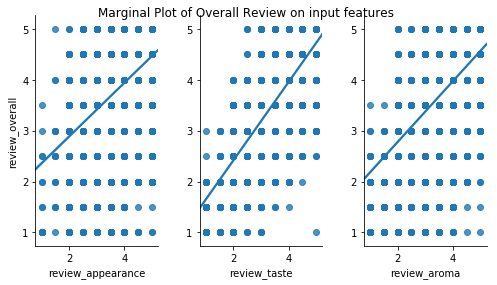

In [38]:
# a quick visualization to kick things off here
sns.pairplot(
    dfTrain,
    x_vars=X_variable,
    y_vars=y_variable,
    size=4,
    aspect=0.6,
    kind='reg')
plt.suptitle("Marginal Plot of Overall Review on input features")

In [12]:
# define a function to scale predicted results to .5 intervals
def scale_to_nearest_half_int(x):
    return round(x * 2) / 2

def scale_predictions(X):
    for i in range(0,X.size):
        X[i] = scale_to_nearest_half_int(X[i])        
    return X

# define a function to build and return test results
def build_test_results(lst, testType, pred, actual, scale_pred):
    score = metrics.r2_score(pred, actual)
    mae = metrics.mean_absolute_error(pred, actual)
    mse = metrics.mean_squared_error(pred, actual)
    rmse = np.sqrt(metrics.mean_squared_error(pred, actual))
    
    # add to lst
    lst.append({"test": testType, "R2Score": score, "MAE": mae, "mse" : mse, "RMSE" : rmse})
    
    if scale_pred:
        pred_scaled = scale_predictions(pred)
        #some recursion
        build_test_results(lst, testType + " (scaled)", pred_scaled, actual,False)
    
    return lst

In [75]:
# start a list
lst_test_results = []

In [76]:
# instantiate and fit
lrMult = LinearRegression()
lrMult.fit(dfTrain[X_variable], dfTrain[y_variable])

# test
y_mult_pred = lrMult.predict(dfTest[X_variable])

# scaled = True
build_test_results(lst_test_results, "Multiple Linear Regression (default)", y_mult_pred, dfTest[y_variable], True)

pd.DataFrame(lst_test_results)

,MAE,R2Score,RMSE,mse,test
0,0.319751,0.340863,0.430940,0.185709,Multiple Linear Regression (default)
1,0.300400,0.385626,0.456048,0.207980,Multiple Linear Regression (default) (scaled)


What is this scaled thing? may or may not be useful... 

Below shows actual vs predicted values (distinct).  The actual values follow a basic scale of .5 increments so scaling will bump predicted values to their nearest .5 increment

In [77]:
# so let's eval unique values
print('Actual Unique values\t', dfTest.review_overall.unique())
print('Predicted Unique values\t', pd.DataFrame(y_mult_pred)[0].unique())

Actual Unique values	 [ 3.   3.5  4.   4.5  2.   5.   2.5  1.   1.5]
Predicted Unique values	 [ 4.   3.5  3.   4.5  2.5  2.   5.   1.5]


no wonder our predictability is so LOW here... let's do some scaling on the predictions then check the scores again

In [78]:
# scale now
scale_predictions(y_mult_pred)
print('Predicted Unique values\t', pd.DataFrame(y_mult_pred)[0].unique())

Predicted Unique values	 [ 4.   3.5  3.   4.5  2.5  2.   5.   1.5]


In [79]:
print('Predicted:\n',pd.DataFrame(y_mult_pred).head(20))
print('Actual:\n',dfTest[y_variable].head(20))

Predicted:
       0
0   4.0
1   3.5
2   4.0
3   3.5
4   3.5
5   4.0
6   3.0
7   3.5
8   4.5
9   3.5
10  3.5
11  4.0
12  4.0
13  4.0
14  3.5
15  4.0
16  3.5
17  3.5
18  3.5
19  2.5
Actual:
      review_overall
1               3.0
16              3.5
17              3.5
24              4.0
29              3.5
36              4.0
38              3.5
40              3.5
42              4.5
45              3.0
45              3.0
51              4.5
55              4.5
56              4.0
78              4.0
79              4.0
91              4.0
99              3.5
122             3.5
129             3.5


OK... that's Linear Regression... - not so great I think... let's try decision tree

In [22]:
# import the goods
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO
import os

In [81]:
# run a quick raw test
decision_tree = DecisionTreeRegressor(max_depth=2)
decision_tree.fit(dfTrain[X_variable], dfTrain[y_variable])
y_pred = decision_tree.predict(dfTest[X_variable])

build_test_results(lst_test_results, "Decision Tree(max_depth=2)", y_pred, dfTest[y_variable], True)
pd.DataFrame(lst_test_results).sort_values(['RMSE'])

,MAE,R2Score,RMSE,mse,test
0,0.319751,0.340863,0.430940,0.185709,Multiple Linear Regression (default)
1,0.300400,0.385626,0.456048,0.207980,Multiple Linear Regression (default) (scaled)
2,0.326117,0.155014,0.459464,0.211107,Decision Tree(max_depth=2)
3,0.315560,0.197625,0.469851,0.220760,Decision Tree(max_depth=2) (scaled)


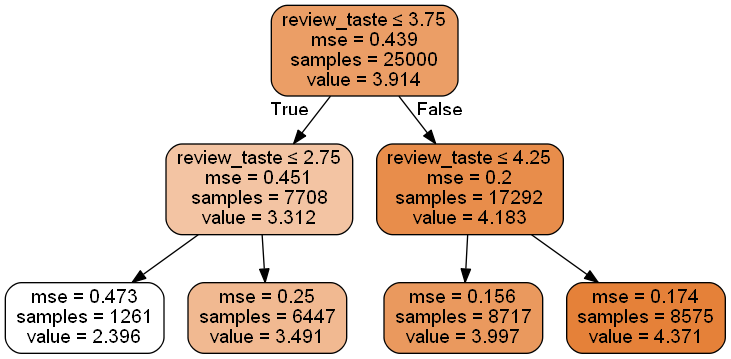

In [82]:
# Visualize what just happened
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
#This allows us to make a decision tree real fast directly in the notebook!
dot_data = StringIO()
export_graphviz(
    decision_tree,
    out_file=dot_data,
    feature_names=X_variable,
    filled=True,
    rounded=True,
    special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

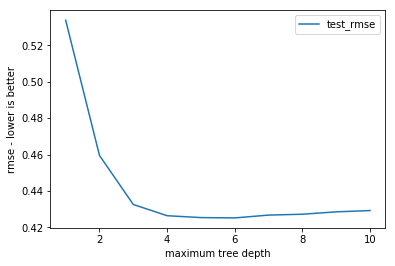

In [83]:
# experiment with using some different max_depth params
depths = range(1, 11)
test_rmse = []
for depth in depths:
    decision_tree = DecisionTreeRegressor(max_depth=depth, random_state=10)
    decision_tree.fit(dfTrain[X_variable], dfTrain[y_variable])
    
    y_pred = decision_tree.predict(dfTest[X_variable])
    
    curr_test_rmse = np.sqrt(mean_squared_error(dfTest[y_variable], y_pred))
    
    test_rmse.append(curr_test_rmse)
    
    if depth <> 2:
        build_test_results(lst_test_results, "Decision Tree(max_depth =" + str(depth) + ")", y_pred, dfTest[y_variable], True)
        
sns.mpl.pyplot.plot(depths, test_rmse, label='test_rmse')
sns.mpl.pyplot.xlabel("maximum tree depth")
sns.mpl.pyplot.ylabel("rmse - lower is better")
sns.mpl.pyplot.legend()

In [84]:
pd.DataFrame(lst_test_results).sort_values(['RMSE'], ascending=[False])

,MAE,R2Score,RMSE,mse,test
5,0.381200,-4.888390,0.564021,0.318120,Decision Tree(max_depth =1) (scaled)
4,0.416146,-0.739629,0.533808,0.284951,Decision Tree(max_depth =1)
3,0.315560,0.197625,0.469851,0.220760,Decision Tree(max_depth=2) (scaled)
2,0.326117,0.155014,0.459464,0.211107,Decision Tree(max_depth=2)
1,0.300400,0.385626,0.456048,0.207980,Multiple Linear Regression (default) (scaled)
7,0.302520,0.445721,0.455873,0.207820,Decision Tree(max_depth =3) (scaled)
21,0.293960,0.412897,0.450932,0.203340,Decision Tree(max_depth =10) (scaled)
19,0.293120,0.426583,0.450044,0.202540,Decision Tree(max_depth =9) (scaled)
17,0.292360,0.430810,0.448999,0.201600,Decision Tree(max_depth =8) (scaled)
15,0.292120,0.446787,0.448308,0.200980,Decision Tree(max_depth =7) (scaled)


6 seems to be the best max depth here... what does that look like in a tree

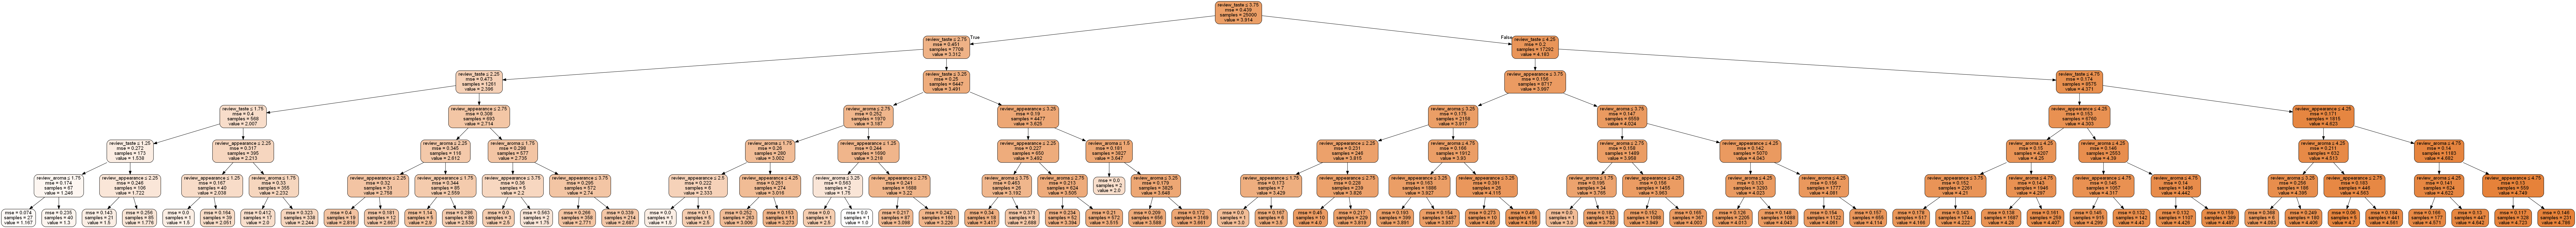

In [86]:
decision_tree = DecisionTreeRegressor(max_depth=6, random_state=10)
decision_tree.fit(dfTrain[X_variable], dfTrain[y_variable])
y_pred = decision_tree.predict(dfTest[X_variable])

dot_data = StringIO()
export_graphviz(
    decision_tree,
    out_file=dot_data,
    feature_names=X_variable,
    filled=True,
    rounded=True,
    special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Next up - BaggingRegressor

In [87]:
#Bag of 500 trees
bagreg = BaggingRegressor(
    DecisionTreeRegressor(),
    n_estimators=500,
    bootstrap=True,
    oob_score=True,
    random_state=123)
bagreg.fit(dfTrain[X_variable], dfTrain[y_variable])
y_pred = bagreg.predict(dfTest[X_variable])

build_test_results(lst_test_results, "Bagging(n_estimators=500)", y_pred, dfTest[y_variable], True)

pd.DataFrame(lst_test_results).sort_values(['RMSE'], ascending=[False])

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,MAE,R2Score,RMSE,mse,test
5,0.381200,-4.888390,0.564021,0.318120,Decision Tree(max_depth =1) (scaled)
4,0.416146,-0.739629,0.533808,0.284951,Decision Tree(max_depth =1)
3,0.315560,0.197625,0.469851,0.220760,Decision Tree(max_depth=2) (scaled)
2,0.326117,0.155014,0.459464,0.211107,Decision Tree(max_depth=2)
1,0.300400,0.385626,0.456048,0.207980,Multiple Linear Regression (default) (scaled)
7,0.302520,0.445721,0.455873,0.207820,Decision Tree(max_depth =3) (scaled)
21,0.293960,0.412897,0.450932,0.203340,Decision Tree(max_depth =10) (scaled)
23,0.294260,0.403986,0.450389,0.202850,Bagging(n_estimators=500) (scaled)
19,0.293120,0.426583,0.450044,0.202540,Decision Tree(max_depth =9) (scaled)
17,0.292360,0.430810,0.448999,0.201600,Decision Tree(max_depth =8) (scaled)


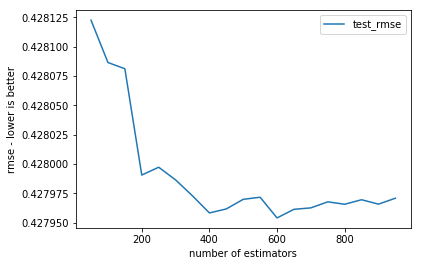

In [88]:
# so what is the optimal number for n_estimators?
estimators = range(50, 1000, 50)
test_rmse = []
for estimator in estimators:
    bagreg = BaggingRegressor(
        DecisionTreeRegressor(),
        n_estimators=estimator,
        bootstrap=True,
        oob_score=True,
        random_state=123)
    bagreg.fit(dfTrain[X_variable], dfTrain[y_variable])
    
    y_pred = bagreg.predict(dfTest[X_variable])    
    
    curr_test_rmse = np.sqrt(mean_squared_error(dfTest[y_variable], y_pred))
    
    test_rmse.append(curr_test_rmse)
    
    if estimator <> 500:
        build_test_results(lst_test_results, "Bagging(n_estimators=" + str(estimator) + ")", y_pred, dfTest[y_variable], True)
    
sns.mpl.pyplot.plot(estimators, test_rmse, label='test_rmse')
sns.mpl.pyplot.xlabel("number of estimators")
sns.mpl.pyplot.ylabel("rmse - lower is better")
sns.mpl.pyplot.legend()

In [91]:
pd.DataFrame(lst_test_results).sort_values(['RMSE'], ascending=[True])

,MAE,R2Score,RMSE,mse,test
12,0.316876,0.382292,0.425139,0.180743,Decision Tree(max_depth =6)
10,0.318047,0.379653,0.425320,0.180898,Decision Tree(max_depth =5)
8,0.320200,0.370858,0.426346,0.181771,Decision Tree(max_depth =4)
14,0.316940,0.381565,0.426691,0.182065,Decision Tree(max_depth =7)
16,0.316814,0.381834,0.427167,0.182472,Decision Tree(max_depth =8)
44,0.317581,0.378295,0.427954,0.183145,Bagging(n_estimators=600)
38,0.317599,0.378532,0.427958,0.183148,Bagging(n_estimators=400)
46,0.317593,0.378250,0.427961,0.183151,Bagging(n_estimators=650)
40,0.317611,0.378295,0.427962,0.183151,Bagging(n_estimators=450)
48,0.317591,0.378277,0.427963,0.183152,Bagging(n_estimators=700)


600 seems the best for bagging but... it really does no better than Decision Tree at max_depth of 6

Let's next try RandomForest to see if we can improve


In [92]:
rf = RandomForestRegressor(
    n_estimators=500, bootstrap=True, oob_score=True, random_state=123)
rf.fit(dfTrain[X_variable], dfTrain[y_variable])
y_pred = rf.predict(dfTest[X_variable])

build_test_results(lst_test_results, "Random Forest (n_estimators=500", y_pred, dfTest[y_variable], True)
    
pd.DataFrame(lst_test_results).sort_values(['RMSE'], ascending=[True])

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


,MAE,R2Score,RMSE,mse,test
12,0.316876,0.382292,0.425139,0.180743,Decision Tree(max_depth =6)
10,0.318047,0.379653,0.425320,0.180898,Decision Tree(max_depth =5)
8,0.320200,0.370858,0.426346,0.181771,Decision Tree(max_depth =4)
14,0.316940,0.381565,0.426691,0.182065,Decision Tree(max_depth =7)
16,0.316814,0.381834,0.427167,0.182472,Decision Tree(max_depth =8)
44,0.317581,0.378295,0.427954,0.183145,Bagging(n_estimators=600)
38,0.317599,0.378532,0.427958,0.183148,Bagging(n_estimators=400)
46,0.317593,0.378250,0.427961,0.183151,Bagging(n_estimators=650)
40,0.317611,0.378295,0.427962,0.183151,Bagging(n_estimators=450)
48,0.317591,0.378277,0.427963,0.183152,Bagging(n_estimators=700)


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


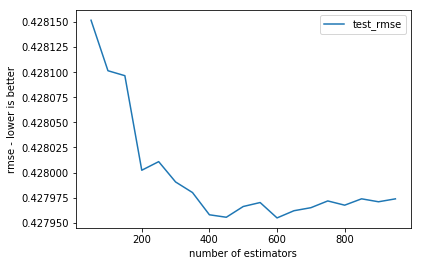

In [93]:
# so what is the optimal number for n_estimators?
estimators = range(50, 1000, 50)
test_rmse = []
for estimator in estimators:
    rf = RandomForestRegressor(
        n_estimators=estimator, bootstrap=True, oob_score=True, random_state=123)
    rf.fit(dfTrain[X_variable], dfTrain[y_variable])
    y_pred = rf.predict(dfTest[X_variable])
    
    curr_test_rmse = np.sqrt(mean_squared_error(dfTest[y_variable], y_pred))
    
    test_rmse.append(curr_test_rmse)
    
    if estimator <> 500:
        build_test_results(lst_test_results, "Random Forest (n_estimators=" + str(estimator) + ")", y_pred, dfTest[y_variable], True)

sns.mpl.pyplot.plot(estimators, test_rmse, label='test_rmse')
sns.mpl.pyplot.xlabel("number of estimators")
sns.mpl.pyplot.ylabel("rmse - lower is better")
sns.mpl.pyplot.legend()

In [94]:

pd.DataFrame(lst_test_results).sort_values(['RMSE'], ascending=[True])

,MAE,R2Score,RMSE,mse,test
12,0.316876,0.382292,0.425139,0.180743,Decision Tree(max_depth =6)
10,0.318047,0.379653,0.425320,0.180898,Decision Tree(max_depth =5)
8,0.320200,0.370858,0.426346,0.181771,Decision Tree(max_depth =4)
14,0.316940,0.381565,0.426691,0.182065,Decision Tree(max_depth =7)
16,0.316814,0.381834,0.427167,0.182472,Decision Tree(max_depth =8)
44,0.317581,0.378295,0.427954,0.183145,Bagging(n_estimators=600)
82,0.317582,0.378331,0.427955,0.183145,Random Forest (n_estimators=600)
78,0.317610,0.378331,0.427955,0.183146,Random Forest (n_estimators=450)
76,0.317601,0.378521,0.427958,0.183148,Random Forest (n_estimators=400)
38,0.317599,0.378532,0.427958,0.183148,Bagging(n_estimators=400)


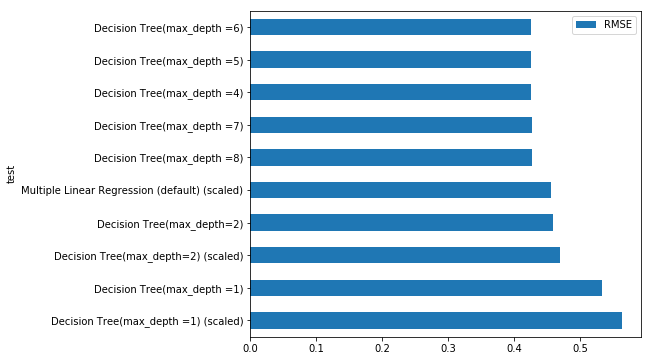

In [129]:
# now plot our test results
dfFinalResults = pd.DataFrame(lst_test_results)
dfFinalResults = dfFinalResults[['RMSE', 'test']] #pd.Series(dfFinalResults.RMSE, index=dfFinalResults.test)
dfFinalResults.set_index('test', inplace=True)
dfFinalResults.sort_values(['RMSE'], inplace=True)

# plotting as is would be a huge mess and impossible to visualize... instead... grab top 5 and bottom 5 and plot those
dfTop5 = dfFinalResults.head(5)
dfBottom5 = dfFinalResults.tail(5)
# reset index on both
dfTop5.reset_index(inplace=True)
dfBottom5.reset_index(inplace=True)

# union these together for dfDisplayResults
dfDisplayResults = dfBottom5.merge(dfTop5, how="outer")
# set index back to test
dfDisplayResults.set_index('test', inplace=True)
# sort on RMSE
dfDisplayResults.sort_values(['RMSE'], ascending=False, inplace=True)
# plot
dfDisplayResults.plot(kind="barh", figsize=(7,6));

## Clear winner... Decision tree (max_depth=6)... 

so with that... we will need to get a new set of data specific to ONLY ONE style and run a Decision tree (max_depth=6) against that data... then by comparing it's RMSE against what we just ran we should be able to determine our answer to the question


`Is there a steady relationship between appearance, aroma, taste across different beer styles - can an overall rating be predicted based on training data from a given beer style against a different distinct beer style.`


In [140]:
# Number to beat
dfFinalResults.RMSE.min()

0.42513914317780188

In [5]:
# get the top reviewed beer style
max_beer_style = beer_styles.number_of_distinct_reviewers.max()
beer_single_style = beer_styles[beer_styles.number_of_distinct_reviewers == max_beer_style]
beer_single_style

,beer_style,number_of_distinct_reviewers,number_of_distinct_brewerys,number_of_distinct_beer,total_brewerys,pct_brewerys,mean_distinct_brewerys,sd_distinct_brewerys,Z_distinct_brewerys,total_reviewers,pct_reviewers,mean_distinct_reviewers,sd_distinct_reviewers,Z_distinct_reviewers,total_beer,pct_Beer,mean_distinct_beer,sd_distinct_beer,Z_distinct_beer
12,American IPA,12480,1606,3167,5742,0.279693,411.259615,346.078418,3.452224,33387,0.373798,3870.201923,2442.428826,3.525097,56857,0.055701,566.269231,558.586222,4.655916


-- American IPA -- top reviewed beer - ha... go figure

In [9]:
# join up with all beer_reviews
beers_for_model = pd.merge(beer_single_style, beer_reviews, how="inner", on=['beer_style'])
print('Shape:\t',beers_for_model.shape)
beers_for_model.head()

Shape:	 (117586, 31)


,beer_style,number_of_distinct_reviewers,number_of_distinct_brewerys,number_of_distinct_beer,total_brewerys,pct_brewerys,mean_distinct_brewerys,sd_distinct_brewerys,Z_distinct_brewerys,total_reviewers,...,review_time,review_overall,review_aroma,review_appearance,review_profilename,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,American IPA,12480,1606,3167,5742,0.279693,411.259615,346.078418,3.452224,33387,...,1272945129,4.0,4.0,4.0,Akfan,4.0,4.5,Caldera IPA,6.1,10784
1,American IPA,12480,1606,3167,5742,0.279693,411.259615,346.078418,3.452224,33387,...,1324238653,4.0,4.0,4.0,coldriver,4.0,4.5,Caldera IPA,6.1,10784
2,American IPA,12480,1606,3167,5742,0.279693,411.259615,346.078418,3.452224,33387,...,1296875377,4.0,4.0,4.0,Mora2000,4.0,4.0,Caldera IPA,6.1,10784
3,American IPA,12480,1606,3167,5742,0.279693,411.259615,346.078418,3.452224,33387,...,1297129212,4.0,4.0,4.0,Rutager,4.0,3.5,Caldera IPA,6.1,10784
4,American IPA,12480,1606,3167,5742,0.279693,411.259615,346.078418,3.452224,33387,...,1297105083,4.5,4.0,4.0,CHILLINDYLAN,4.0,4.0,Caldera IPA,6.1,10784


In [17]:
# that's a lotta records... trim it down
dfTrain = trimDataRows(beers_for_model, 25000)
dfTest = trimDataRows(beers_for_model, 25000)

In [23]:
# run the test
decision_tree = DecisionTreeRegressor(max_depth=6)
decision_tree.fit(dfTrain[X_variable], dfTrain[y_variable])
y_pred = decision_tree.predict(dfTest[X_variable])

rmse = np.sqrt(metrics.mean_squared_error(y_pred, dfTest[y_variable]))
print('RMSE:\t', rmse)

RMSE:	 0.380601660917


## Final assessment:

* `RMSE across a range of beer styles: 0.42513914317780188`
* `RMSE across an individual style: 0.380601660917`

Our intial question was

`Is there a steady relationship between appearance, aroma, taste across different beer styles - can an overall rating be predicted based on training data from a given beer style against a different distinct beer style.`

And the answer would seem `Fairly Close`.  The RMSE across an individual style is in fact less however not significantly less so their would appear to be a steady relationship between appearance, aroma and taste across different styles of beer such that their impact on determining an overall rating is steady.

However some things are left to be explained and it now appears this Question may not be a regression question afterall.  The remaining notebooks will first explore why RMSE is higher when the predicted values are scaled to better match target values and then reanswer this question as a classificaiton question.